<a href="https://colab.research.google.com/github/JuanPDuran/MODELOS-/blob/main/Modelos_SARIMA_Apple_Shares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import yfinance as yf

dfmodelo = yf.download("AAPL", start="2023-04-03", end="2024-01-05")

print(dfmodelo)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-03  164.270004  166.289993  164.220001  166.169998  165.287750   
2023-04-04  166.600006  166.839996  165.110001  165.630005  164.750626   
2023-04-05  164.740005  165.050003  161.800003  163.759995  162.890533   
2023-04-06  162.429993  164.960007  162.000000  164.660004  163.785767   
2023-04-10  161.419998  162.029999  160.080002  162.029999  161.169739   
...                ...         ...         ...         ...         ...   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   
2024-01-02  187.149994  188.440002  183.889999  185.639999  185.403412   
2024-01-03  184.220001  185.880005  183.429993  184.250000  184.015198   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.678177   

              Volume  
Date          

In [7]:
# Eliminar todas las columnas excepto "Close"
dfmodelo = dfmodelo.drop(columns=dfmodelo.columns.difference(['Close']))

# Mostrar el DataFrame con solo la columna "Close"
display(dfmodelo)

,Close
Date,
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
2023-04-06,164.660004
2023-04-10,162.029999
...,...
2023-12-28,193.580002
2023-12-29,192.529999
2024-01-02,185.639999


In [8]:
import yfinance as yf
from IPython.display import display

# Descargar los datos de las acciones de Apple
reales = yf.download("AAPL", start="2023-04-03", end="2024-04-30")

# Mostrar los datos descargados
print(reales)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-03  164.270004  166.289993  164.220001  166.169998  165.287735   
2023-04-04  166.600006  166.839996  165.110001  165.630005  164.750626   
2023-04-05  164.740005  165.050003  161.800003  163.759995  162.890533   
2023-04-06  162.429993  164.960007  162.000000  164.660004  163.785767   
2023-04-10  161.419998  162.029999  160.080002  162.029999  161.169724   
...                ...         ...         ...         ...         ...   
2024-04-23  165.350006  167.050003  164.919998  166.899994  166.899994   
2024-04-24  166.539993  169.300003  166.210007  169.020004  169.020004   
2024-04-25  169.529999  170.610001  168.149994  169.889999  169.889999   
2024-04-26  169.880005  171.339996  169.179993  169.300003  169.300003   
2024-04-29  173.369995  176.029999  173.100006  173.500000  173.500000   

              Volume  
Date          

In [9]:
# Eliminar todas las columnas excepto "Close"
reales = reales.drop(columns=reales.columns.difference(['Close']))

# Mostrar el DataFrame con solo la columna "Close"
display(reales)

,Close
Date,
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
2023-04-06,164.660004
2023-04-10,162.029999
...,...
2024-04-23,166.899994
2024-04-24,169.020004
2024-04-25,169.889999


In [10]:
# Reiniciar el índice y enumerar las filas desde 1
dfmodelo.reset_index(drop=True, inplace=True)
dfmodelo.index += 1

reales.reset_index(drop=True, inplace=True)
reales.index += 1


display(dfmodelo)
display(reales)

,Close
1,166.169998
2,165.630005
3,163.759995
4,164.660004
5,162.029999
...,...
187,193.580002
188,192.529999
189,185.639999
190,184.250000


,Close
1,166.169998
2,165.630005
3,163.759995
4,164.660004
5,162.029999
...,...
266,166.899994
267,169.020004
268,169.889999
269,169.300003


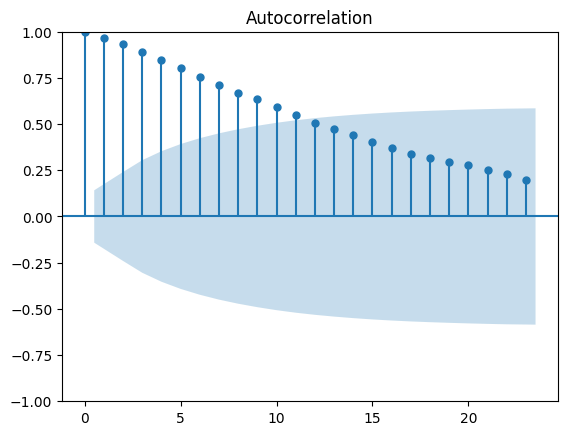

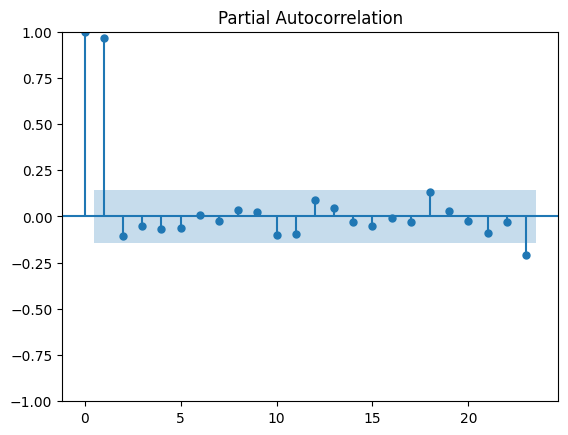

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

grafico1 = plot_acf(dfmodelo)

grafico2 = plot_pacf(dfmodelo)

In [78]:
#MI MODELOCO :v

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_sarima = SARIMAX(dfmodelo["Close"], order=(3,1,6), seasonal_order=(2,1,6,12))
resultado = modelo_sarima.fit()

print(resultado.summary())

predicciones = resultado.forecast(steps=100)

print(predicciones)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  191
Model:             SARIMAX(3, 1, 6)x(2, 1, 6, 12)   Log Likelihood                -401.592
Date:                            Wed, 08 May 2024   AIC                            839.184
Time:                                    19:04:34   BIC                            896.456
Sample:                                         0   HQIC                           862.409
                                            - 191                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0959      0.426     -0.225      0.822      -0.931       0.739
ar.L2         -0.2307      0.348   

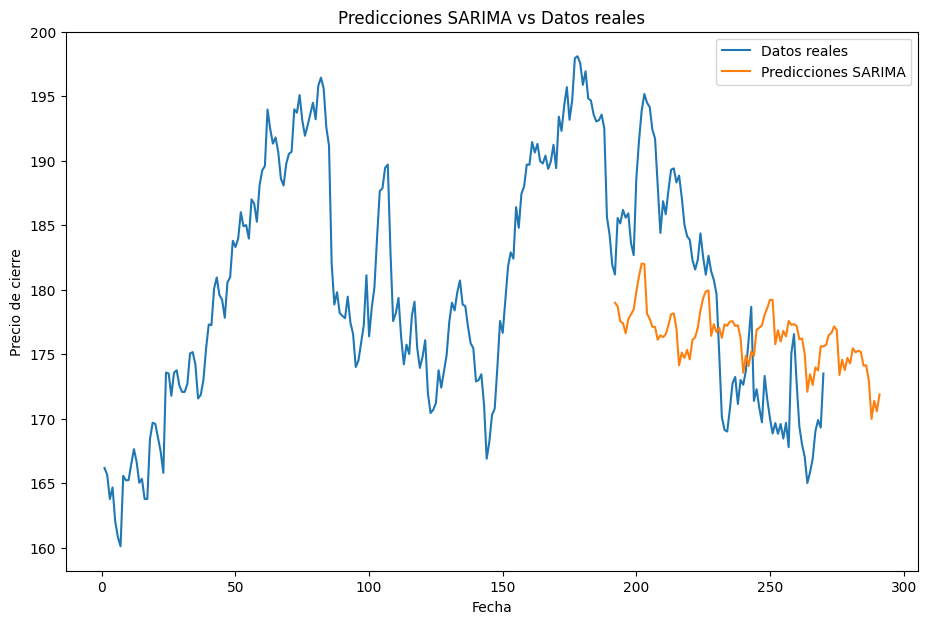

In [74]:
import matplotlib.pyplot as plt

#Establecer tamaño del gráfico:
plt.figure(figsize=(11, 7))


# Trazar los datos reales
plt.plot(reales.index, reales['Close'], label='Datos reales')

# Trazar las predicciones
plt.plot(predicciones.index, predicciones, label='Predicciones SARIMA')

# Agregar etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.title("Predicciones SARIMA vs Datos reales")

# Mostrar la leyenda con tamaño personalizado
plt.legend(prop={'size': 10})  # Ajusta el tamaño de la leyenda a 12

# Mostrar el gráfico
plt.show()



In [33]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.0 MB/s eta 0:00:00


In [34]:
import pmdarima as pm


In [57]:
import pmdarima as pm

# Definir la grilla de parámetros SARIMA
p = range(0, 2)  # Parámetro de estacionalidad (p)
d = range(1, 2)  # Parámetro de diferenciación (d)
q = range(0, 2)  # Parámetro de autorregresión (q)
P = range(0, 2)  # Parámetro de estacionalidad autorregresiva (P)
D = range(0, 2)  # Parámetro de estacionalidad de diferenciación (D)
Q = range(0, 2)  # Parámetro de estacionalidad de autorregresión (Q)
m = 12  # Periodo de estacionalidad

# Crear la grilla de parámetros SARIMA
param_grid = {
    'order': [(p, d, q)],
    'seasonal_order': [(P, D, Q, m)],
    'trend': ['ct', 'c', 't', 'n']  # Tendencias posibles
}

# Definir las métricas de precisión
scoring = ['mse', 'mae', 'aic']

# Realizar la búsqueda de cuadrícula

model = pm.auto_arima(dfmodelo, seasonal=True, m=m, stepwise=True, suppress_warnings=True,
                      start_p=1, start_q=1, max_p=3, max_q=3, max_order=None,
                      error_action='ignore', trace=True, scoring='mse')

# Mostrar los resultados
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=838.593, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=836.729, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=836.706, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=836.405, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=835.007, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=836.038, Time=0.09 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=835.713, Time=0.09 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=836.585, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=836.857, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=836.876, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=838.749, Time=0.53 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 2.290 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 

In [61]:
#MODELO PYTHON

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_sarima = SARIMAX(dfmodelo["Close"], order=(0,1,1), seasonal_order=(0,0,1,12))
resultado2 = modelo_sarima.fit()

print(resultado2.summary())

prediccionesPYTHON = resultado2.forecast(steps=100)

print(prediccionesPYTHON)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  191
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -414.396
Date:                            Wed, 08 May 2024   AIC                            834.792
Time:                                    18:37:52   BIC                            844.533
Sample:                                         0   HQIC                           838.738
                                            - 191                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0844      0.076      1.107      0.268      -0.065       0.234
ma.S.L12      -0.1247      0.087   

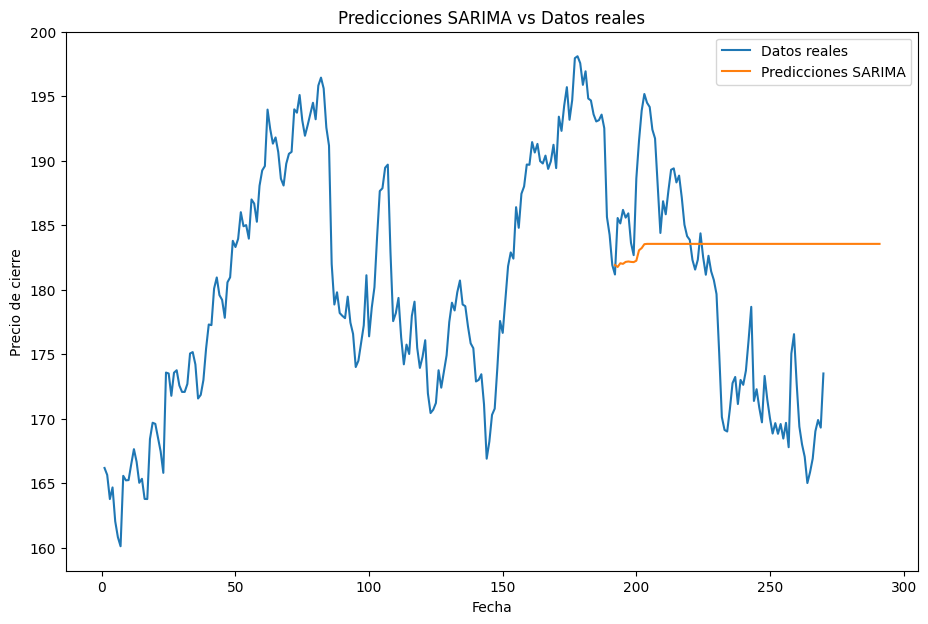

In [62]:
#Gráfico best model

import matplotlib.pyplot as plt

#Establecer tamaño del gráfico:
plt.figure(figsize=(11, 7))


# Trazar los datos reales
plt.plot(reales.index, reales['Close'], label='Datos reales')

# Trazar las predicciones
plt.plot(prediccionesPYTHON.index, prediccionesPYTHON, label='Predicciones SARIMA')

# Agregar etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.title("Predicciones SARIMA vs Datos reales")

# Mostrar la leyenda con tamaño personalizado
plt.legend(prop={'size': 10})  # Ajusta el tamaño de la leyenda a 12

# Mostrar el gráfico
plt.show()


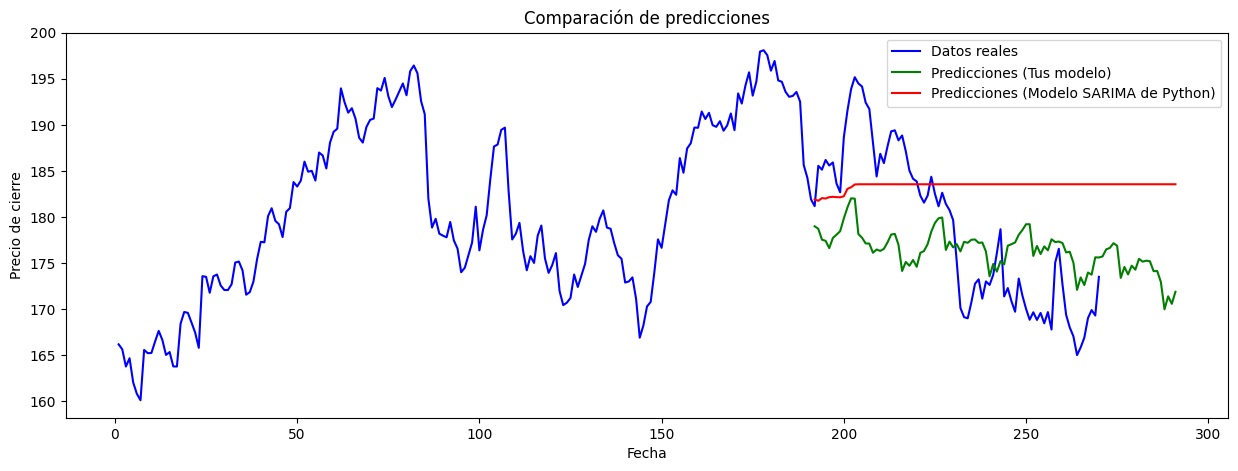

In [75]:
#COMPARACIÓN DE MODELOS: PYTHON VS YO. BUAJUAJUAJUA:

import matplotlib.pyplot as plt

#TAMAÑO GRÁFICO:
plt.figure(figsize=(15,5))

# Graficar los datos reales
plt.plot(reales.index, reales['Close'], label='Datos reales', color='blue')

# Graficar las predicciones de tu modelo
plt.plot(predicciones.index, predicciones, label='Predicciones (Tus modelo)', color='green')

# Graficar las predicciones del modelo SARIMA de Python
plt.plot(prediccionesPYTHON.index, prediccionesPYTHON, label='Predicciones (Modelo SARIMA de Python)', color='red')

# Añadir etiquetas y título al gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Comparación de predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()


In [81]:
#OJO, PRIMERA RED NEURONAL, TENER CUIDADO CON DATAFRAMES.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [83]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Preparación de los datos
# Asegúrate de tener los datos en el formato adecuado para la red neuronal

# Definir el número de pasos de tiempo y características
n_timesteps = 10
n_features = 1

# Diseño del modelo
model = Sequential([
    LSTM(units=64, input_shape=(n_timesteps, n_features)),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Validación del modelo
loss = model.evaluate(X_test, y_test)

# Predicción de 100 días o periodos
n_dias_prediccion = 100
NeuronasP = []

# Última secuencia conocida (para comenzar las predicciones)
ultima_secuencia = dfmodelo.iloc[-n_timesteps:].values.reshape(1, n_timesteps, n_features)

# Realizar predicciones para n_dias_prediccion
for _ in range(n_dias_prediccion):
    # Predecir el siguiente día
    prediccion = model.predict(ultima_secuencia)[0, 0]

    # Agregar la predicción a la lista de predicciones
    NeuronasP.append(prediccion)

    # Actualizar la secuencia conocida para incluir la nueva predicción
    ultima_secuencia = np.append(ultima_secuencia[:, 1:, :], [[[prediccion]]], axis=1)

# Convertir las predicciones a un arreglo numpy
NeuronasP = np.array(NeuronasP)


NameError: name 'X_train' is not defined

In [86]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

# Preparación de los datos
# Asegúrate de tener los datos en el formato adecuado para la red neuronal
# Suponiendo que tienes un dataframe llamado dfmodelo con tus datos

# Definir el número de pasos de tiempo y características
n_timesteps = 100
n_features = 1

# Convertir el dataframe en un array numpy
data = dfmodelo['Close'].values.reshape(-1, 1)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(data[:-n_timesteps], data[n_timesteps:], test_size=0.2, shuffle=False)

# Diseño del modelo
model = Sequential([
    LSTM(units=64, input_shape=(n_timesteps, n_features)),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Validación del modelo
loss = model.evaluate(X_val, y_val)

# Predicción de 100 días o periodos
n_dias_prediccion = 100
NeuronasP = []

# Última secuencia conocida (para comenzar las predicciones)
ultima_secuencia = data[-n_timesteps:].reshape(1, n_timesteps, n_features)

# Realizar predicciones para n_dias_prediccion
for _ in range(n_dias_prediccion):
    # Predecir el siguiente día
    prediccion = model.predict(ultima_secuencia)[0, 0]

    # Agregar la predicción a la lista de predicciones
    NeuronasP.append(prediccion)

    # Actualizar la secuencia conocida para incluir la nueva predicción
    ultima_secuencia = np.append(ultima_secuencia[:, 1:, :], [[[prediccion]]], axis=1)

# Convertir las predicciones a un arreglo numpy
NeuronasP = np.array(NeuronasP)


Epoch 1/10
3/3 [==============================] - 6s 291ms/step - loss: 32574.0586 - val_loss: 37394.0977
Epoch 2/10
3/3 [==============================] - 0s 33ms/step - loss: 32526.4785 - val_loss: 37344.3633
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 32479.5410 - val_loss: 37293.2734
Epoch 4/10
3/3 [==============================] - 0s 19ms/step - loss: 32431.6250 - val_loss: 37239.7617
Epoch 5/10
3/3 [==============================] - 0s 29ms/step - loss: 32381.7266 - val_loss: 37184.5195
Epoch 6/10
3/3 [==============================] - 0s 24ms/step - loss: 32330.7422 - val_loss: 37129.0977
Epoch 7/10
3/3 [==============================] - 0s 29ms/step - loss: 32280.1387 - val_loss: 37075.3555
Epoch 8/10
3/3 [==============================] - 0s 21ms/step - loss: 32230.9414 - val_loss: 37023.9336
Epoch 9/10
3/3 [==============================] - 0s 23ms/step - loss: 32183.4902 - val_loss: 36973.9180
Epoch 10/10
1/1 [==============================] - 0s 

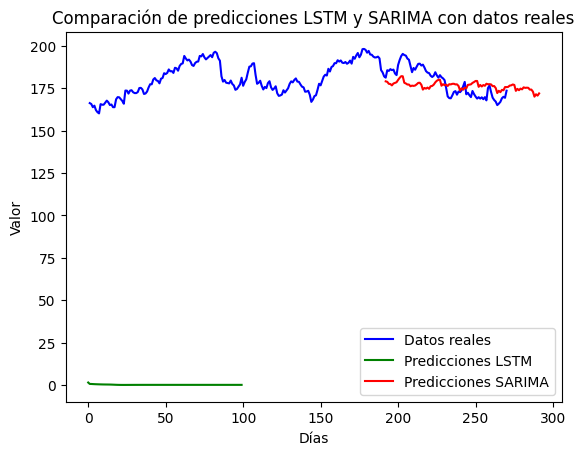

In [87]:
import matplotlib.pyplot as plt

# Datos reales
plt.plot(reales, label='Datos reales', color='blue')

# Predicciones del modelo LSTM
plt.plot(NeuronasP, label='Predicciones LSTM', color='green')

# Predicciones del modelo SARIMA (supongamos que se llaman 'prediccionesSARIMA')
plt.plot(predicciones, label='Predicciones SARIMA', color='red')

plt.xlabel('Días')
plt.ylabel('Valor')
plt.title('Comparación de predicciones LSTM y SARIMA con datos reales')
plt.legend()
plt.show()
